In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)
#plt.rcParams["xtick.labelsize"] = 7

Yearly Citations Figure

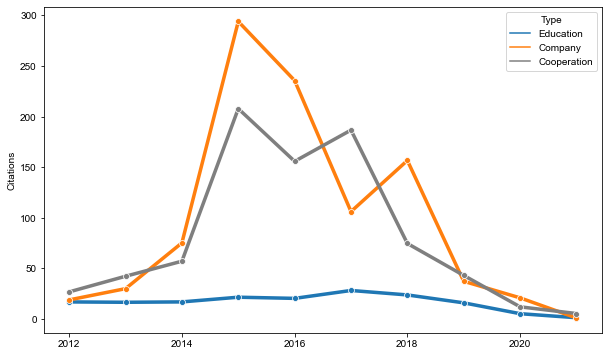

In [2]:
# Einlesen
dfYC = pd.read_csv('YearlyCitations.csv')

dfYCEdu = pd.DataFrame(columns = ['Year','Citations','Type'])
dfYCEdu['Citations'] = dfYC['Education']
dfYCEdu['Year'] = dfYC['Year']
dfYCEdu['Type'] = ['Education' for x in range(len(dfYCEdu.index))]

dfYCCom = pd.DataFrame(columns = ['Year','Citations','Type'])
dfYCCom['Citations'] = dfYC['Company']
dfYCCom['Year'] = dfYC['Year']
dfYCCom['Type'] = ['Company' for x in range(len(dfYCCom.index))]

dfYCBoth = pd.DataFrame(columns = ['Year','Citations','Type'])
dfYCBoth['Citations'] = dfYC['Cooperation']
dfYCBoth['Year'] = dfYC['Year']
dfYCBoth['Type'] = ['Cooperation' for x in range(len(dfYCBoth.index))]

dfYCAll = pd.concat([dfYCEdu, dfYCCom, dfYCBoth], ignore_index=True)

# Yearly Citations Lineplot
ax = sns.lineplot(data=dfYCAll,
            x='Year',
            y='Citations',
            hue='Type',
            marker='o',
            linewidth = 3.5,
            palette=['tab:blue','tab:orange','tab:grey']
            )
sns.set(font_scale=1.75)
plt.xlabel("")
plt.show()

Paper Count Figures

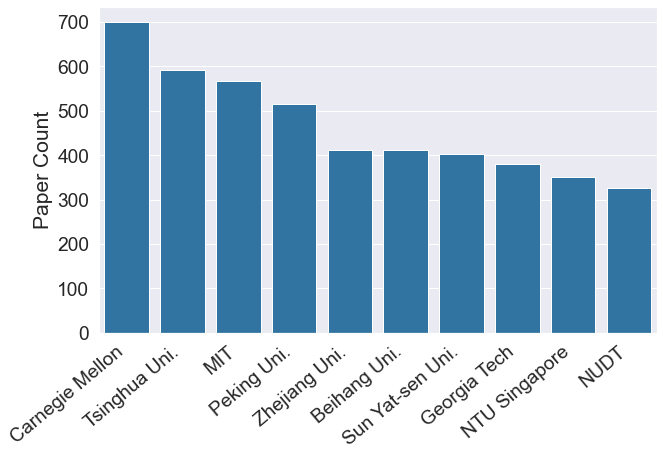

In [3]:
df7Edu = pd.read_csv('Fig7Edu.csv')

fig7E = sns.barplot(data=df7Edu,
            x='Company',
            y='Paper Count',
            color='tab:blue'
            )
fig7E.set_xticklabels(fig7E.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("")
plt.show()


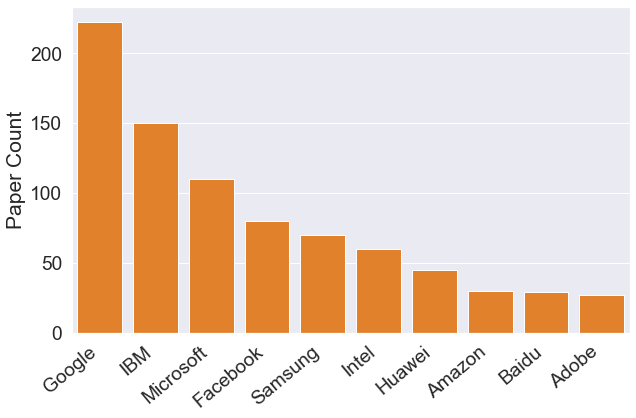

In [4]:
df7Com = pd.read_csv('Fig7Com.csv')

fig7C = sns.barplot(data=df7Com,
            x='Company',
            y='Paper Count',
            color='tab:orange'
            )
fig7C.set_xticklabels(fig7C.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("")
plt.show()


Citation Count Figures

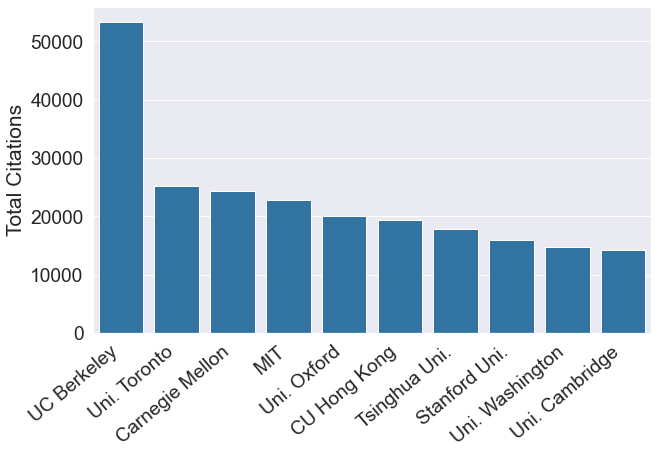

In [5]:
df8Edu = pd.read_csv('Fig8Edu.csv')

fig8E = sns.barplot(data=df8Edu,
            x='Company',
            y='Citation Count',
            color='tab:blue'
            )
fig8E.set_xticklabels(fig8E.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("")
plt.ylabel("Total Citations")
plt.show()

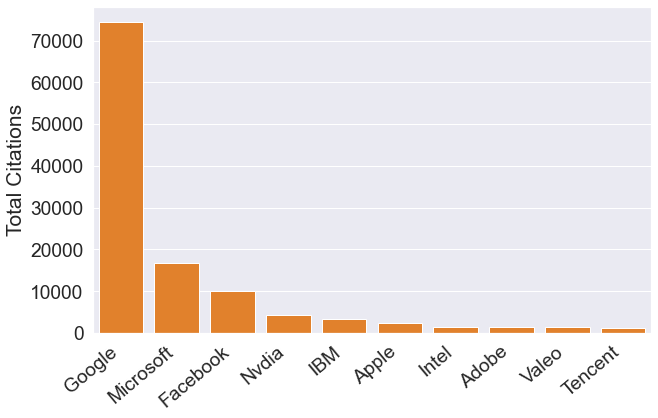

In [6]:
df8Com = pd.read_csv('Fig8Com.csv')

fig8C = sns.barplot(data=df8Com,
            x='Company',
            y='Citation Count',
            color='tab:orange'
            )
fig8C.set_xticklabels(fig8C.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("")
plt.ylabel("Total Citations")
plt.show()

Publication and Citation Shares

In [7]:
sns.set(font_scale=2)

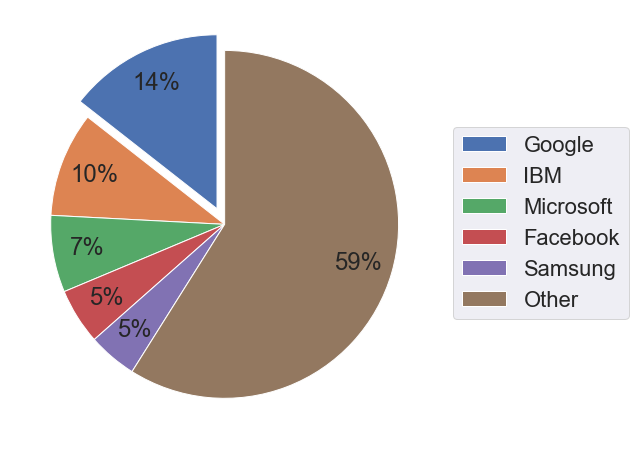

In [9]:
df9Com = pd.read_csv('Fig9Com.csv')

colors = sns.color_palette()[0:6]
explode = [0.1,0,0,0,0,0]

fig91 = plt.figure(figsize =(10, 8))
fig91 = plt.pie(df9Com['Papers'],
                labels=df9Com['Company'],
                labeldistance=None,
                startangle=90,
                pctdistance=0.8,
                colors=colors,
                autopct='%.0f%%',
                explode=explode
                )
plt.legend(bbox_to_anchor =(1,0.75), ncol = 1)
plt.show()

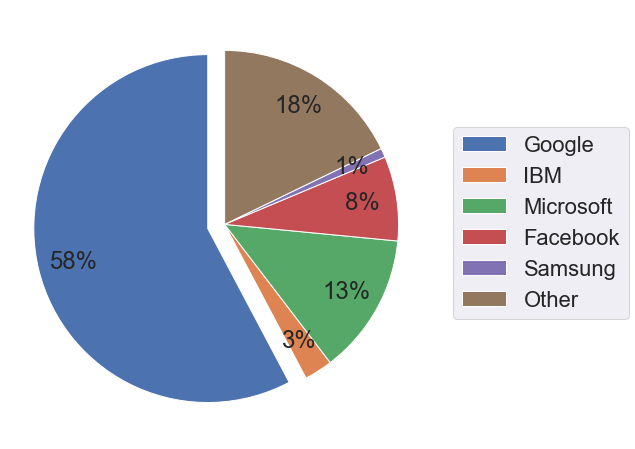

In [10]:
df9Com = pd.read_csv('Fig9Com.csv')

colors = sns.color_palette()[0:6]
explode = [0.1,0,0,0,0,0]

fig92 = plt.figure(figsize =(10, 8))
fig92 = plt.pie(df9Com['Citations'],
                labels=df9Com['Company'],
                labeldistance=None,
                startangle=90,
                pctdistance=0.8,
                colors=colors,
                autopct='%.0f%%',
                explode=explode
                )
plt.legend(bbox_to_anchor =(1,0.75), ncol = 1)
plt.show()

Mean citations per sample

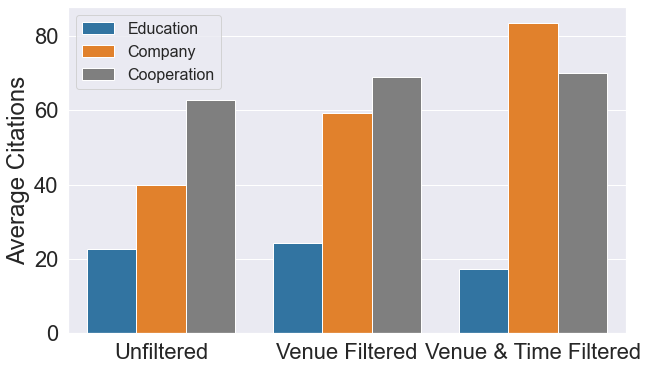

In [11]:
df3 = pd.read_csv('Fig3.csv',)

fig3 = sns.barplot(data=df3,
            x='Sample',
            y='Average Citations',
            hue='Type',
            palette=['tab:blue','tab:orange','tab:grey']
            )
plt.legend(prop={'size': 16})
plt.xlabel("")
plt.show()


Boxplot

c:\Users\Laza\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


77853
18.0
35.25
55.5
64235


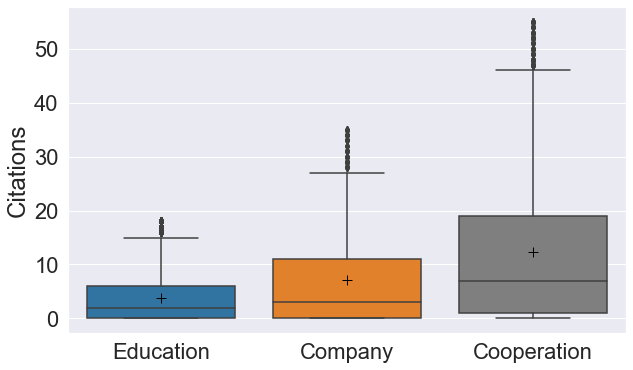

In [12]:
# Einlesen
dfPapers = pd.read_csv('D:/Unizeugs/PythonScripts/Bachelorarbeit/FoS/FOSAll.tsv', sep='\t')
print(len(dfPapers.index))
dfPapers.sort_values('CitationCount',ascending=False, inplace=True)

# Je Gruppe Outliergrenze bestimmen und alles darüber entfernen
dfEdu = dfPapers[dfPapers['GroupType']=='Education']
IQR = dfEdu['CitationCount'].quantile(.75)-dfEdu['CitationCount'].quantile(.25)
limit = IQR*1.5
print(limit)
dfEdu = dfEdu.drop(dfEdu[dfEdu['CitationCount']>limit].index)
dfCom = dfPapers[dfPapers['GroupType']=='Company']
IQR = dfCom['CitationCount'].quantile(.75)-dfCom['CitationCount'].quantile(.25)
limit = IQR*1.5
print(limit)
dfCom = dfCom.drop(dfCom[dfCom['CitationCount']>limit].index)
dfBoth = dfPapers[dfPapers['GroupType']=='Cooperation']
IQR = dfBoth['CitationCount'].quantile(.75)-dfBoth['CitationCount'].quantile(.25)
limit = IQR*1.5
print(limit)
dfBoth = dfBoth.drop(dfBoth[dfBoth['CitationCount']>limit].index)

# Zusammenfügen
df = pd.concat([dfEdu,dfCom,dfBoth], ignore_index=True)
print(len(df.index))
# Boxplot
#fig = plt.figure(figsize =(10, 8))
fig4 = sns.boxplot( x='GroupType', y='CitationCount',
            data=df, 
            showmeans=True, 
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"},
            palette=['tab:blue','tab:orange','tab:grey']
            )
sns.set(font_scale=1.75)
plt.xlabel("")
plt.ylabel("Citations")
plt.show()

Correlation Matrix

c:\Users\Laza\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


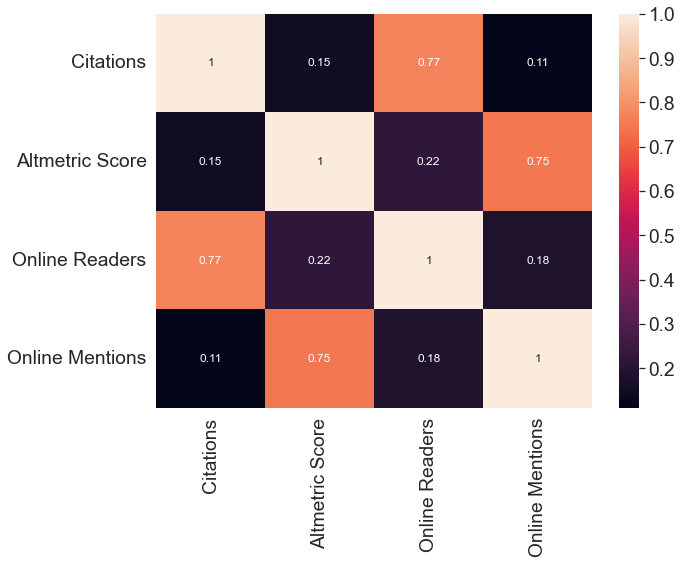

In [17]:
# Einlesen
dfAllAlt = pd.read_csv('../Altmetrics/AllAlt.tsv', sep='\t', header=0)
df = dfAllAlt[['CitationCount','Score','Readers_count','Cited_by_accounts_count','GroupType']]
df.rename(columns={ 'CitationCount':'Citations', 'Score':'Altmetric Score', 'Readers_count':'Online Readers', 'Cited_by_accounts_count':'Online Mentions'}, inplace = True)


# Matrix
corr_df=df.corr(method="pearson")
plt.figure(figsize =(10, 8))
plt.rc('font', size=12) 
fig10 = sns.heatmap(corr_df,annot=True)
fig10.figure.tight_layout()
plt.show()

Tag Matches

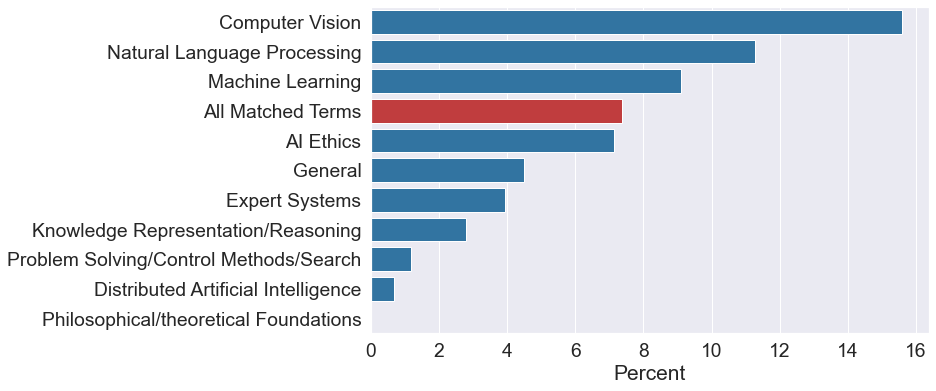

In [18]:
df13 = pd.read_csv('Fig13.csv')
df13 = df13.sort_values('Percent',ascending=False)
colors=['tab:blue','tab:blue','tab:blue','tab:red','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue','tab:blue',]
fig13 = sns.barplot(data=df13,
            x='Percent',
            y='Subfield',
            palette=colors
            )

#fig8C.set_xticklabels(fig8C.get_xticklabels(), rotation=40, ha="right")
plt.ylabel("")
plt.show()